## Extracción de datos

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

Diccionario de símbolos

In [2]:
symbol_map = {
    "EURUSD": "EURUSD=X",
    "USDJPY": "USDJPY=X",
    "GBPUSD": "GBPUSD=X",
    "XAUUSD": "GC=F",
    "BTCUSD": "BTC-USD",
    "SPX": "^GSPC",
    "NASDAQ": "^IXIC",
    "DOW": "^DJI"
}

Parámetros de extracción

In [3]:
intervalo = "1d"
años = 10
dias_maximos = 30
dias_totales = años * 365
hoy = datetime.now()
fecha_inicio = hoy - timedelta(days=dias_totales)

Ciclo de extracción

In [4]:
columnas_deseadas = ['Open','High','Low','Close','Adj Close','Volume'] #definir las columnas que queremos mantener
df_todos = []
for nombre, ticker in symbol_map.items():
    print(f"\n📥 Descargando datos para {nombre} ({ticker})")
    data_acumulada = []
    fecha_actual = fecha_inicio
    while fecha_actual < hoy:
        fecha_final = min(fecha_actual + timedelta(days=dias_maximos), hoy)
        print(f"  - Desde {fecha_actual.date()} hasta {fecha_final.date()}")
        datos = yf.download(
            ticker,
            start=fecha_actual.strftime('%Y-%m-%d'),
            end=fecha_final.strftime('%Y-%m-%d'),
            interval=intervalo,
            progress=False,
            prepost=True
        )
        if not datos.empty:
            datos = datos.copy() 
            if isinstance(datos.columns, pd.MultiIndex): #verificar si tenemos MultiIndex en columnas y aplanarlo
                datos.columns = datos.columns.get_level_values(0) 
            columnas_existentes = [col for col in columnas_deseadas if col in datos.columns] #mantener solo las columnas que queremos
            datos = datos[columnas_existentes]
            datos["symbol"] = ticker #agregar columna de símbolo
            data_acumulada.append(datos)
        fecha_actual = fecha_final
    if data_acumulada:
        df_final = pd.concat(data_acumulada)
        df_final = df_final[~df_final.index.duplicated(keep='first')]
        df_final.index.name = "datetime"
        df_todos.append(df_final)
    else:
        print(f"⚠️ No se encontraron datos para {nombre} ({ticker})")
if df_todos:
    df_todo = pd.concat(df_todos)
    df_todo.to_csv(f"todos_{intervalo}_{años}y.csv")
    print("✅ CSV único generado: todos_{}_{}y.csv".format(intervalo, años))
    print(f"📊 Forma final: {df_todo.shape} - Columnas: {list(df_todo.columns)}")
else:
    print("❌ No se obtuvieron datos para ningún símbolo.")


📥 Descargando datos para EURUSD (EURUSD=X)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(



📥 Descargando datos para USDJPY (USDJPY=X)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(



📥 Descargando datos para GBPUSD (GBPUSD=X)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(
C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13
  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(
C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08
  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(



📥 Descargando datos para XAUUSD (GC=F)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(



📥 Descargando datos para BTCUSD (BTC-USD)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(



📥 Descargando datos para SPX (^GSPC)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(



📥 Descargando datos para NASDAQ (^IXIC)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(



📥 Descargando datos para DOW (^DJI)
  - Desde 2015-11-28 hasta 2015-12-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2015-12-28 hasta 2016-01-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-01-27 hasta 2016-02-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-02-26 hasta 2016-03-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-03-27 hasta 2016-04-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-04-26 hasta 2016-05-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-05-26 hasta 2016-06-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-06-25 hasta 2016-07-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-07-25 hasta 2016-08-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-08-24 hasta 2016-09-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-09-23 hasta 2016-10-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-10-23 hasta 2016-11-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-11-22 hasta 2016-12-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2016-12-22 hasta 2017-01-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-01-21 hasta 2017-02-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-02-20 hasta 2017-03-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-03-22 hasta 2017-04-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-04-21 hasta 2017-05-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-05-21 hasta 2017-06-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-06-20 hasta 2017-07-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-07-20 hasta 2017-08-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-08-19 hasta 2017-09-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-09-18 hasta 2017-10-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-10-18 hasta 2017-11-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-11-17 hasta 2017-12-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2017-12-17 hasta 2018-01-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-01-16 hasta 2018-02-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-02-15 hasta 2018-03-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-03-17 hasta 2018-04-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-04-16 hasta 2018-05-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-05-16 hasta 2018-06-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-06-15 hasta 2018-07-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-07-15 hasta 2018-08-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-08-14 hasta 2018-09-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-09-13 hasta 2018-10-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-10-13 hasta 2018-11-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-11-12 hasta 2018-12-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2018-12-12 hasta 2019-01-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-01-11 hasta 2019-02-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-02-10 hasta 2019-03-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-03-12 hasta 2019-04-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-04-11 hasta 2019-05-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-05-11 hasta 2019-06-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-06-10 hasta 2019-07-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-07-10 hasta 2019-08-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-08-09 hasta 2019-09-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-09-08 hasta 2019-10-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-10-08 hasta 2019-11-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-11-07 hasta 2019-12-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2019-12-07 hasta 2020-01-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-01-06 hasta 2020-02-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-02-05 hasta 2020-03-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-03-06 hasta 2020-04-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-04-05 hasta 2020-05-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-05-05 hasta 2020-06-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-06-04 hasta 2020-07-04


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-07-04 hasta 2020-08-03


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-08-03 hasta 2020-09-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-09-02 hasta 2020-10-02


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-10-02 hasta 2020-11-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-11-01 hasta 2020-12-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-01 hasta 2020-12-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2020-12-31 hasta 2021-01-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-01-30 hasta 2021-03-01


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-01 hasta 2021-03-31


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-03-31 hasta 2021-04-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-04-30 hasta 2021-05-30


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-05-30 hasta 2021-06-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-06-29 hasta 2021-07-29


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-07-29 hasta 2021-08-28


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-08-28 hasta 2021-09-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-09-27 hasta 2021-10-27


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-10-27 hasta 2021-11-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-11-26 hasta 2021-12-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2021-12-26 hasta 2022-01-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-01-25 hasta 2022-02-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-02-24 hasta 2022-03-26


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-03-26 hasta 2022-04-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-04-25 hasta 2022-05-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-05-25 hasta 2022-06-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-06-24 hasta 2022-07-24


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-07-24 hasta 2022-08-23


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-08-23 hasta 2022-09-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-09-22 hasta 2022-10-22


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-10-22 hasta 2022-11-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-11-21 hasta 2022-12-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2022-12-21 hasta 2023-01-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-01-20 hasta 2023-02-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-02-19 hasta 2023-03-21


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-03-21 hasta 2023-04-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-04-20 hasta 2023-05-20


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-05-20 hasta 2023-06-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-06-19 hasta 2023-07-19


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-07-19 hasta 2023-08-18


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-08-18 hasta 2023-09-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-09-17 hasta 2023-10-17


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-10-17 hasta 2023-11-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-11-16 hasta 2023-12-16


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2023-12-16 hasta 2024-01-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-01-15 hasta 2024-02-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-02-14 hasta 2024-03-15


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-03-15 hasta 2024-04-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-04-14 hasta 2024-05-14


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-05-14 hasta 2024-06-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-06-13 hasta 2024-07-13


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-07-13 hasta 2024-08-12


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-08-12 hasta 2024-09-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-09-11 hasta 2024-10-11


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-10-11 hasta 2024-11-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-11-10 hasta 2024-12-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2024-12-10 hasta 2025-01-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-01-09 hasta 2025-02-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-02-08 hasta 2025-03-10


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-03-10 hasta 2025-04-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-04-09 hasta 2025-05-09


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-05-09 hasta 2025-06-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-06-08 hasta 2025-07-08


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-07-08 hasta 2025-08-07


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-08-07 hasta 2025-09-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-09-06 hasta 2025-10-06


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-10-06 hasta 2025-11-05


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


  - Desde 2025-11-05 hasta 2025-11-25


C:\Users\daparohe\AppData\Local\Temp\ipykernel_35112\3226314590.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(


✅ CSV único generado: todos_1d_10y.csv
📊 Forma final: (21497, 6) - Columnas: ['Open', 'High', 'Low', 'Close', 'Volume', 'symbol']


In [6]:
df_todo[df_todo["symbol"]=="BTC-USD"]

Price,Open,High,Low,Close,Volume,symbol
datetime,,,,,,
2015-11-28,357.140991,359.536011,352.171997,357.381012,36816600,BTC-USD
2015-11-29,357.471985,371.938995,355.665985,371.294006,40409300,BTC-USD
2015-11-30,371.437012,382.363007,370.382996,377.321014,71701600,BTC-USD
2015-12-01,377.414001,378.931000,356.562988,362.488007,60452200,BTC-USD
2015-12-02,361.845001,362.231995,349.464996,359.187012,54160500,BTC-USD
...,...,...,...,...,...,...
2025-11-20,91459.351562,93025.070312,86040.796875,86631.898438,97970645638,BTC-USD
2025-11-21,86528.773438,87380.804688,80659.812500,85090.687500,129157506112,BTC-USD
2025-11-22,85098.562500,85503.007812,83490.898438,84648.359375,40793099246,BTC-USD


## Matriz de correlación

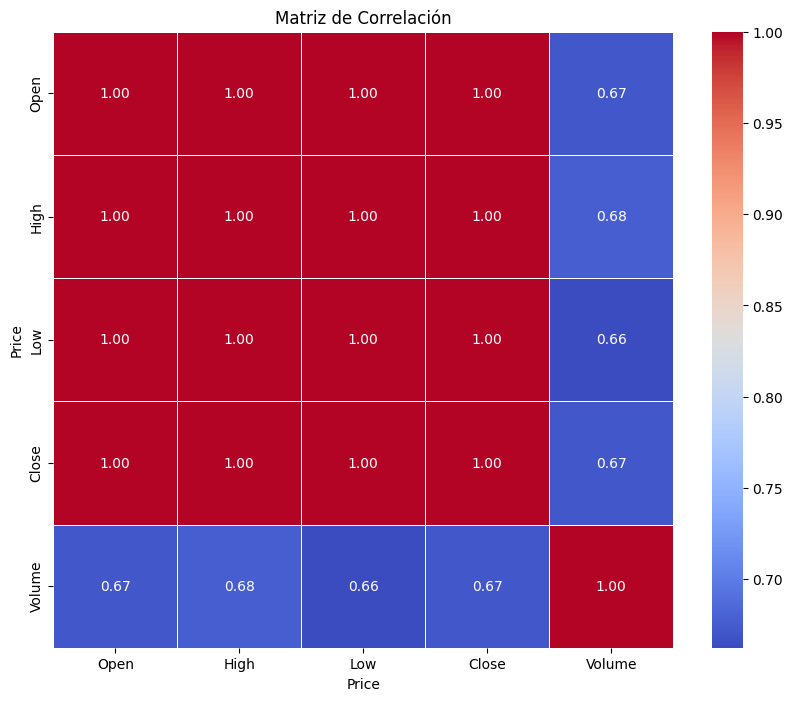

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_corr = df_todo.drop(columns=["symbol"]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## Gráficas descriptivas

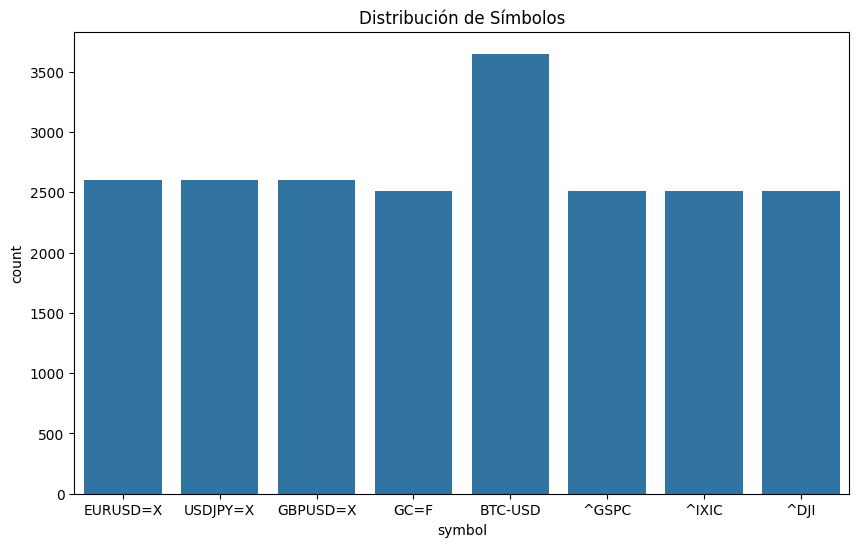

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_todo, x=df_todo["symbol"]) #para una sola variable categórica
plt.title(f'Distribución de Símbolos')
plt.show()

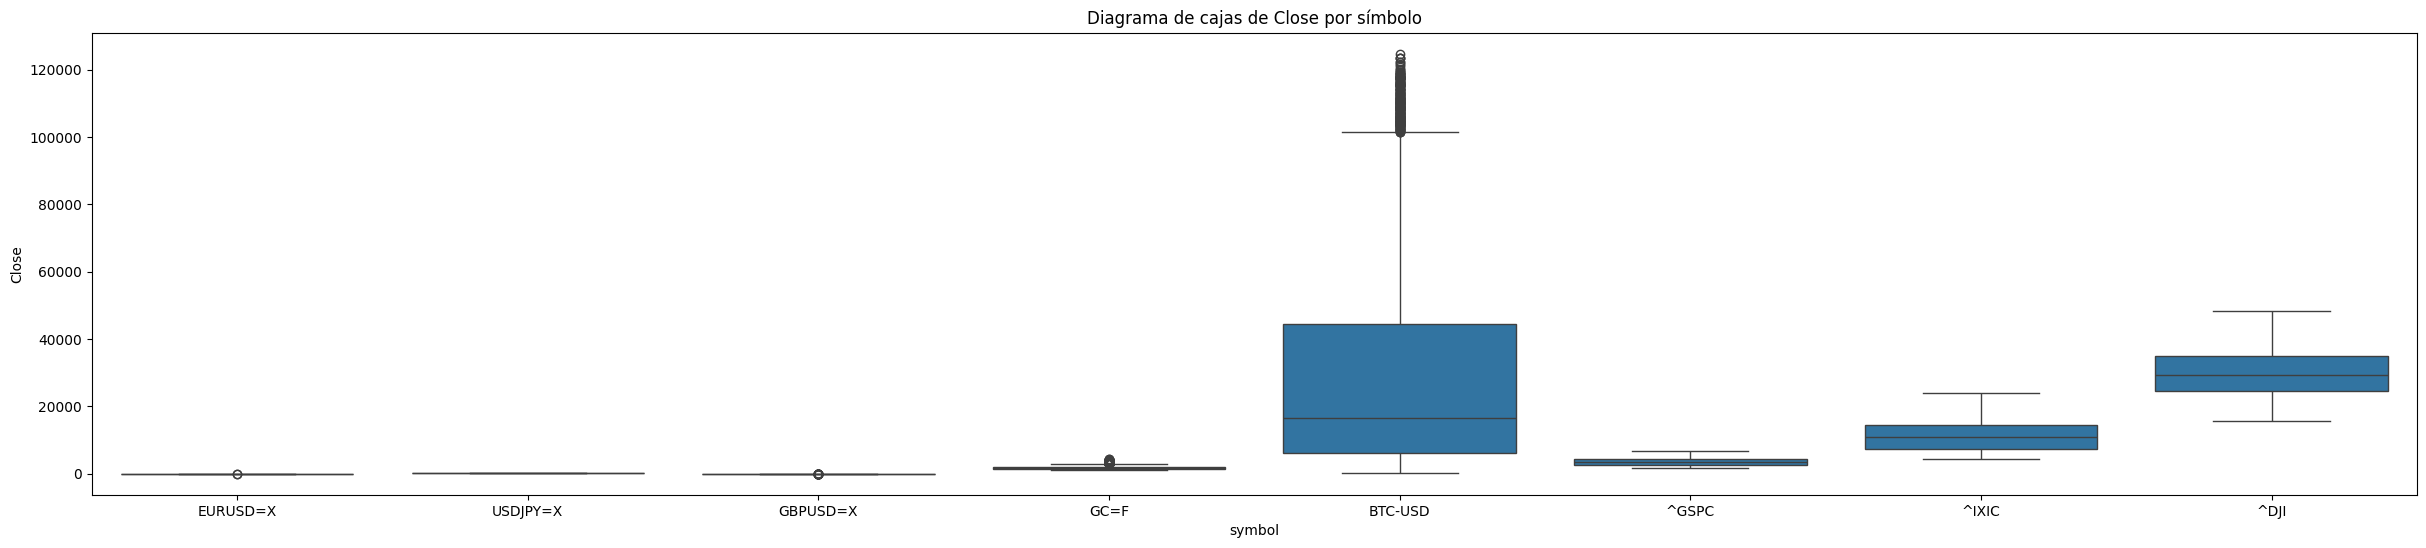

In [12]:
plt.figure(figsize=(30, 6))
sns.boxplot(data=df_todo, x="symbol", y='Close') #x es variable categórica y Y es variable contínua
plt.title('Diagrama de cajas de Close por símbolo')
plt.show()

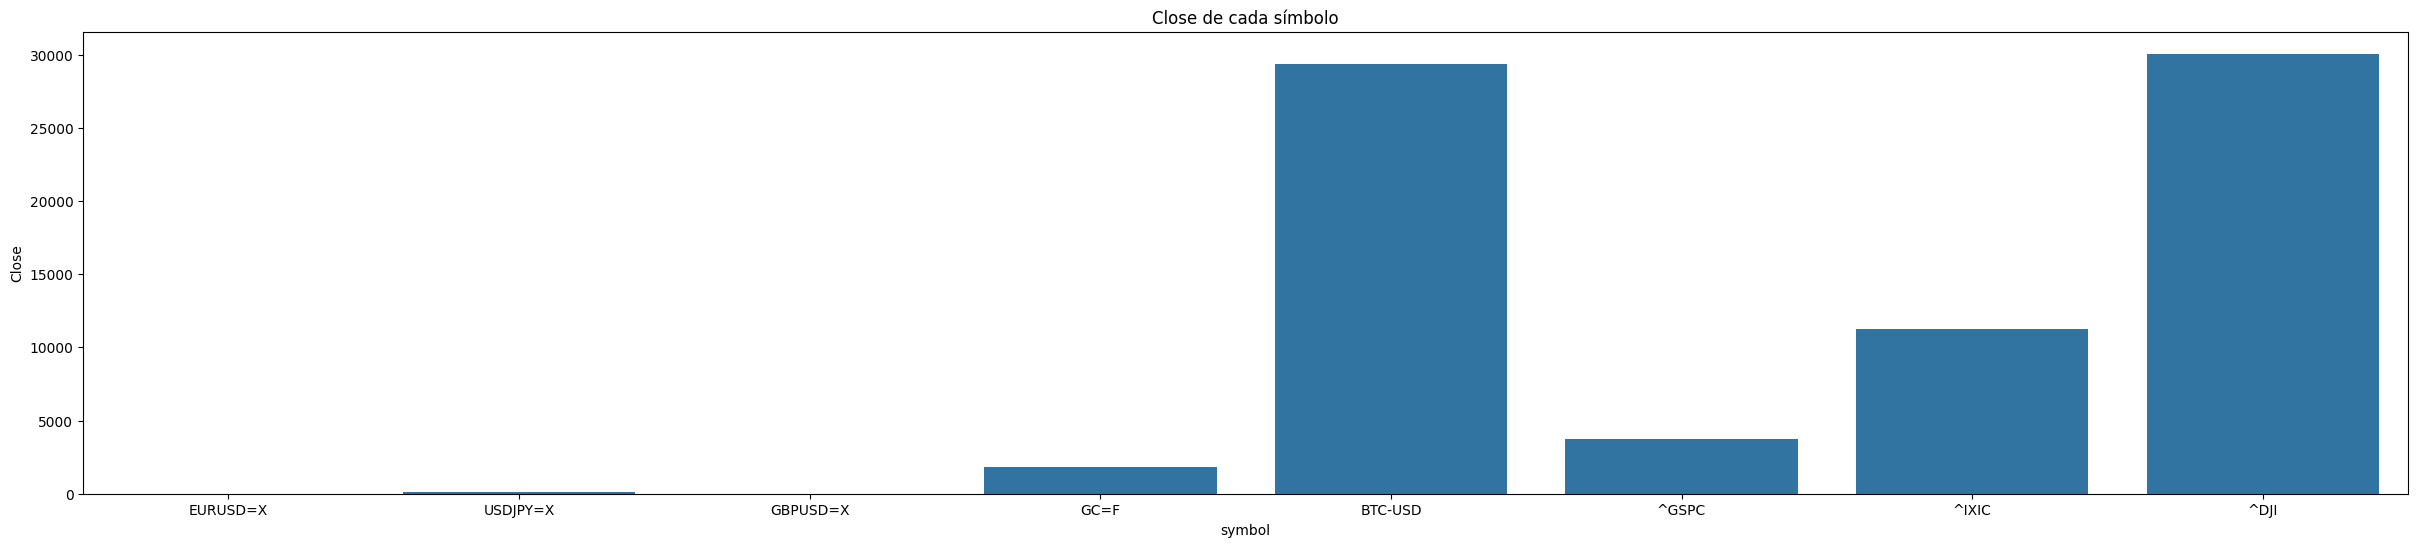

In [13]:
plt.figure(figsize=(30, 6))
sns.barplot(data=df_todo, x="symbol", y="Close", errorbar=None) #x es variable categórica y Y es variable contínua
plt.title("Close de cada símbolo")
plt.show()

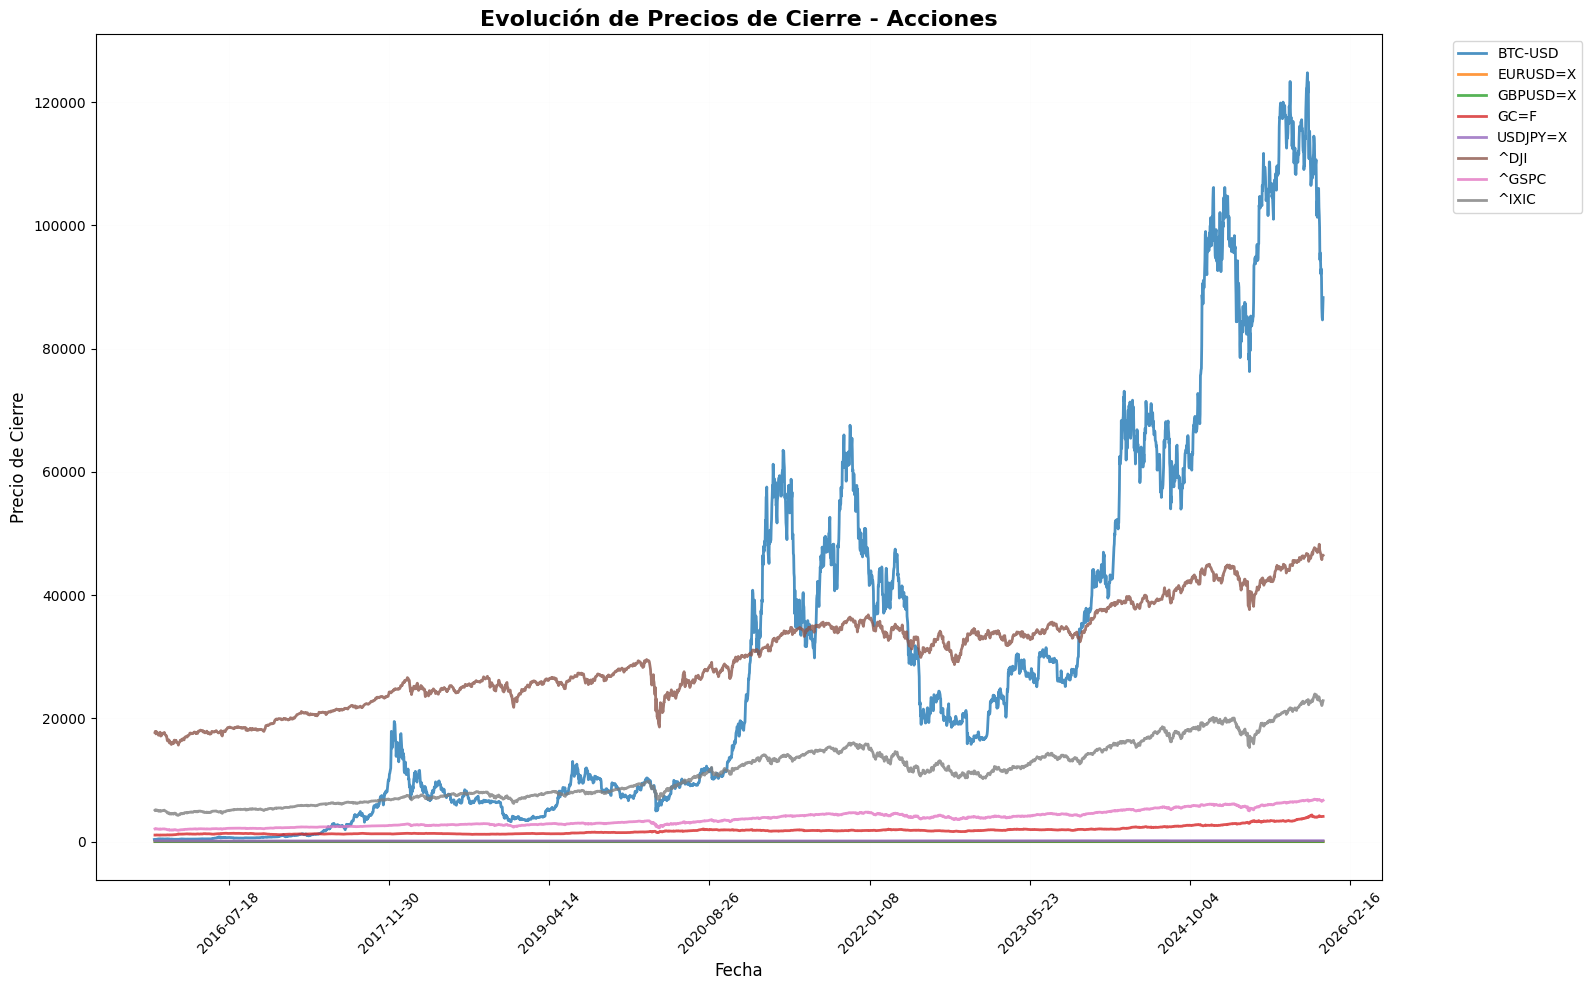

In [ ]:
closes = df_todo.pivot_table(index='datetime', columns='symbol', values='Close')
plt.figure(figsize=(16, 10))
for simbolo in closes.columns:
    data = closes[simbolo].dropna()
    plt.plot(data.index, data, label=f'{simbolo}', linewidth=2, alpha=0.8)
plt.title('Evolución de Precios de Cierre - Acciones', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.02)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()